<a href="https://colab.research.google.com/github/matheus-piah/google_colabs/blob/main/CursoRedeNeural_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curso Udemy
https://www.udemy.com/course/deep-learning-com-python-az-curso-completo/learn/lecture/10619134#overview

##Classificação Binária de Cancer de Mama

import libraries

In [39]:
import tensorflow as tf
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from matplotlib import pyplot as plt

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


import bd

In [5]:
previsores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CursoUdemy/entradas_breast.csv')
classe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CursoUdemy/saidas_breast.csv')

In [18]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

In [49]:
from keras.backend import dropout
classificador = Sequential()
classificador.add(Dense(units = 16, 
                        activation='relu', 
                        kernel_initializer= 'random_uniform', 
                        name = 'Hidden1',
                        input_dim=30)) #numero de nodos: number of classificators+1 /2
classificador.add(tf.keras.layers.Dropout(rate=0.2))

classificador.add(Dense(units = 8, 
                        activation='relu', 
                        kernel_initializer= 'random_uniform',
                        name = 'Hidden2')) 

classificador.add(Dense(units = 1, activation = 'sigmoid'))

otimizador = tf.keras.optimizers.Adam(lr=0.001,
                                   decay=0.0001,
                                   clipvalue=0.5)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
43/43 [==============================] - 2s 2ms/step - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 2/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 3/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 4/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0959 - mean_squared_error: 0.0959
Epoch 5/30
43/43 [==============================] - 0s 2ms/step - loss: 0.0903 - mean_squared_error: 0.0903
Epoch 6/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 7/30
43/43 [==============================] - 2s 48ms/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 8/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 9/30
43/43 [==============================] - 0s 2ms/step - loss: 0.1206 - mean_squared_error: 0.1206
Epoch 10/30
43/43 [========

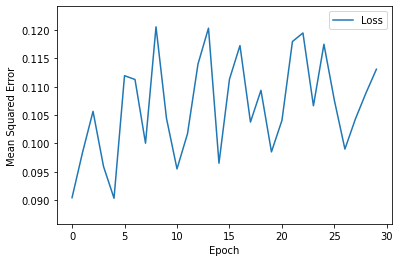

In [53]:
#hyperparameters
batches = 10
epochs = 30

#classification
classificador.compile(optimizer = otimizador, 
                      loss = 'mean_squared_error', 
                      metrics=['mean_squared_error'])

history = classificador.fit(previsores_treinamento,
                            classe_treinamento,
                            batch_size = batches, 
                            epochs = epochs)

epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["mean_squared_error"]

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(epochs, mse, label="Loss")
plt.legend()
plt.ylim([mse.min()*0.95, mse.max() * 1.03])
plt.show()  


In [54]:
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

resultado = classificador.evaluate(previsores_teste,classe_teste)


5/5 [==============================] - 0s 3ms/step - loss: 0.1254 - mean_squared_error: 0.1254
